# SC1015 Mini Project 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
sb.set()

## Exploratory Data Analysis

In [1]:
table = pd.read_csv('Spotify 2010 - 2019 Top 100.csv')
spotifyData = table.set_index('top year', drop=False)

spotifyData = spotifyData.drop(['year released', 'title', 'artist', 'added'], axis=1)

numeric_cols = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
z_scores = spotifyData[numeric_cols].apply(zscore)

threshold = 2.5
outliers = (z_scores > threshold).any(axis=1)
spotifyData = spotifyData[~outliers]

spfySongs_2018_2019 = spotifyData.loc[(spotifyData['top year'] == 2018) | (spotifyData['top year'] == 2019)]
spotifyData.describe()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,120.207018,71.097076,67.630409,-5.450292,16.191813,51.987135,217.722807,11.815205,8.692398,74.781287,2014.466667
std,23.410409,14.082017,12.223390,1.753430,9.895741,21.426276,32.370320,14.346286,6.806294,8.735651,2.864791
min,65.000000,25.000000,31.000000,-13.000000,2.000000,4.000000,113.000000,0.000000,2.000000,35.000000,2010.000000
25%,100.500000,61.000000,60.000000,-6.000000,9.000000,36.000000,198.000000,2.000000,4.000000,70.000000,2012.000000
50%,122.000000,73.000000,68.000000,-5.000000,12.000000,52.000000,216.000000,6.000000,6.000000,76.000000,2014.000000
75%,132.000000,82.000000,76.000000,-4.000000,21.000000,70.000000,235.000000,18.000000,10.500000,81.000000,2017.000000
max,186.000000,98.000000,96.000000,-1.000000,50.000000,97.000000,314.000000,62.000000,33.000000,95.000000,2019.000000


<Axes: xlabel='top year', ylabel='pop'>

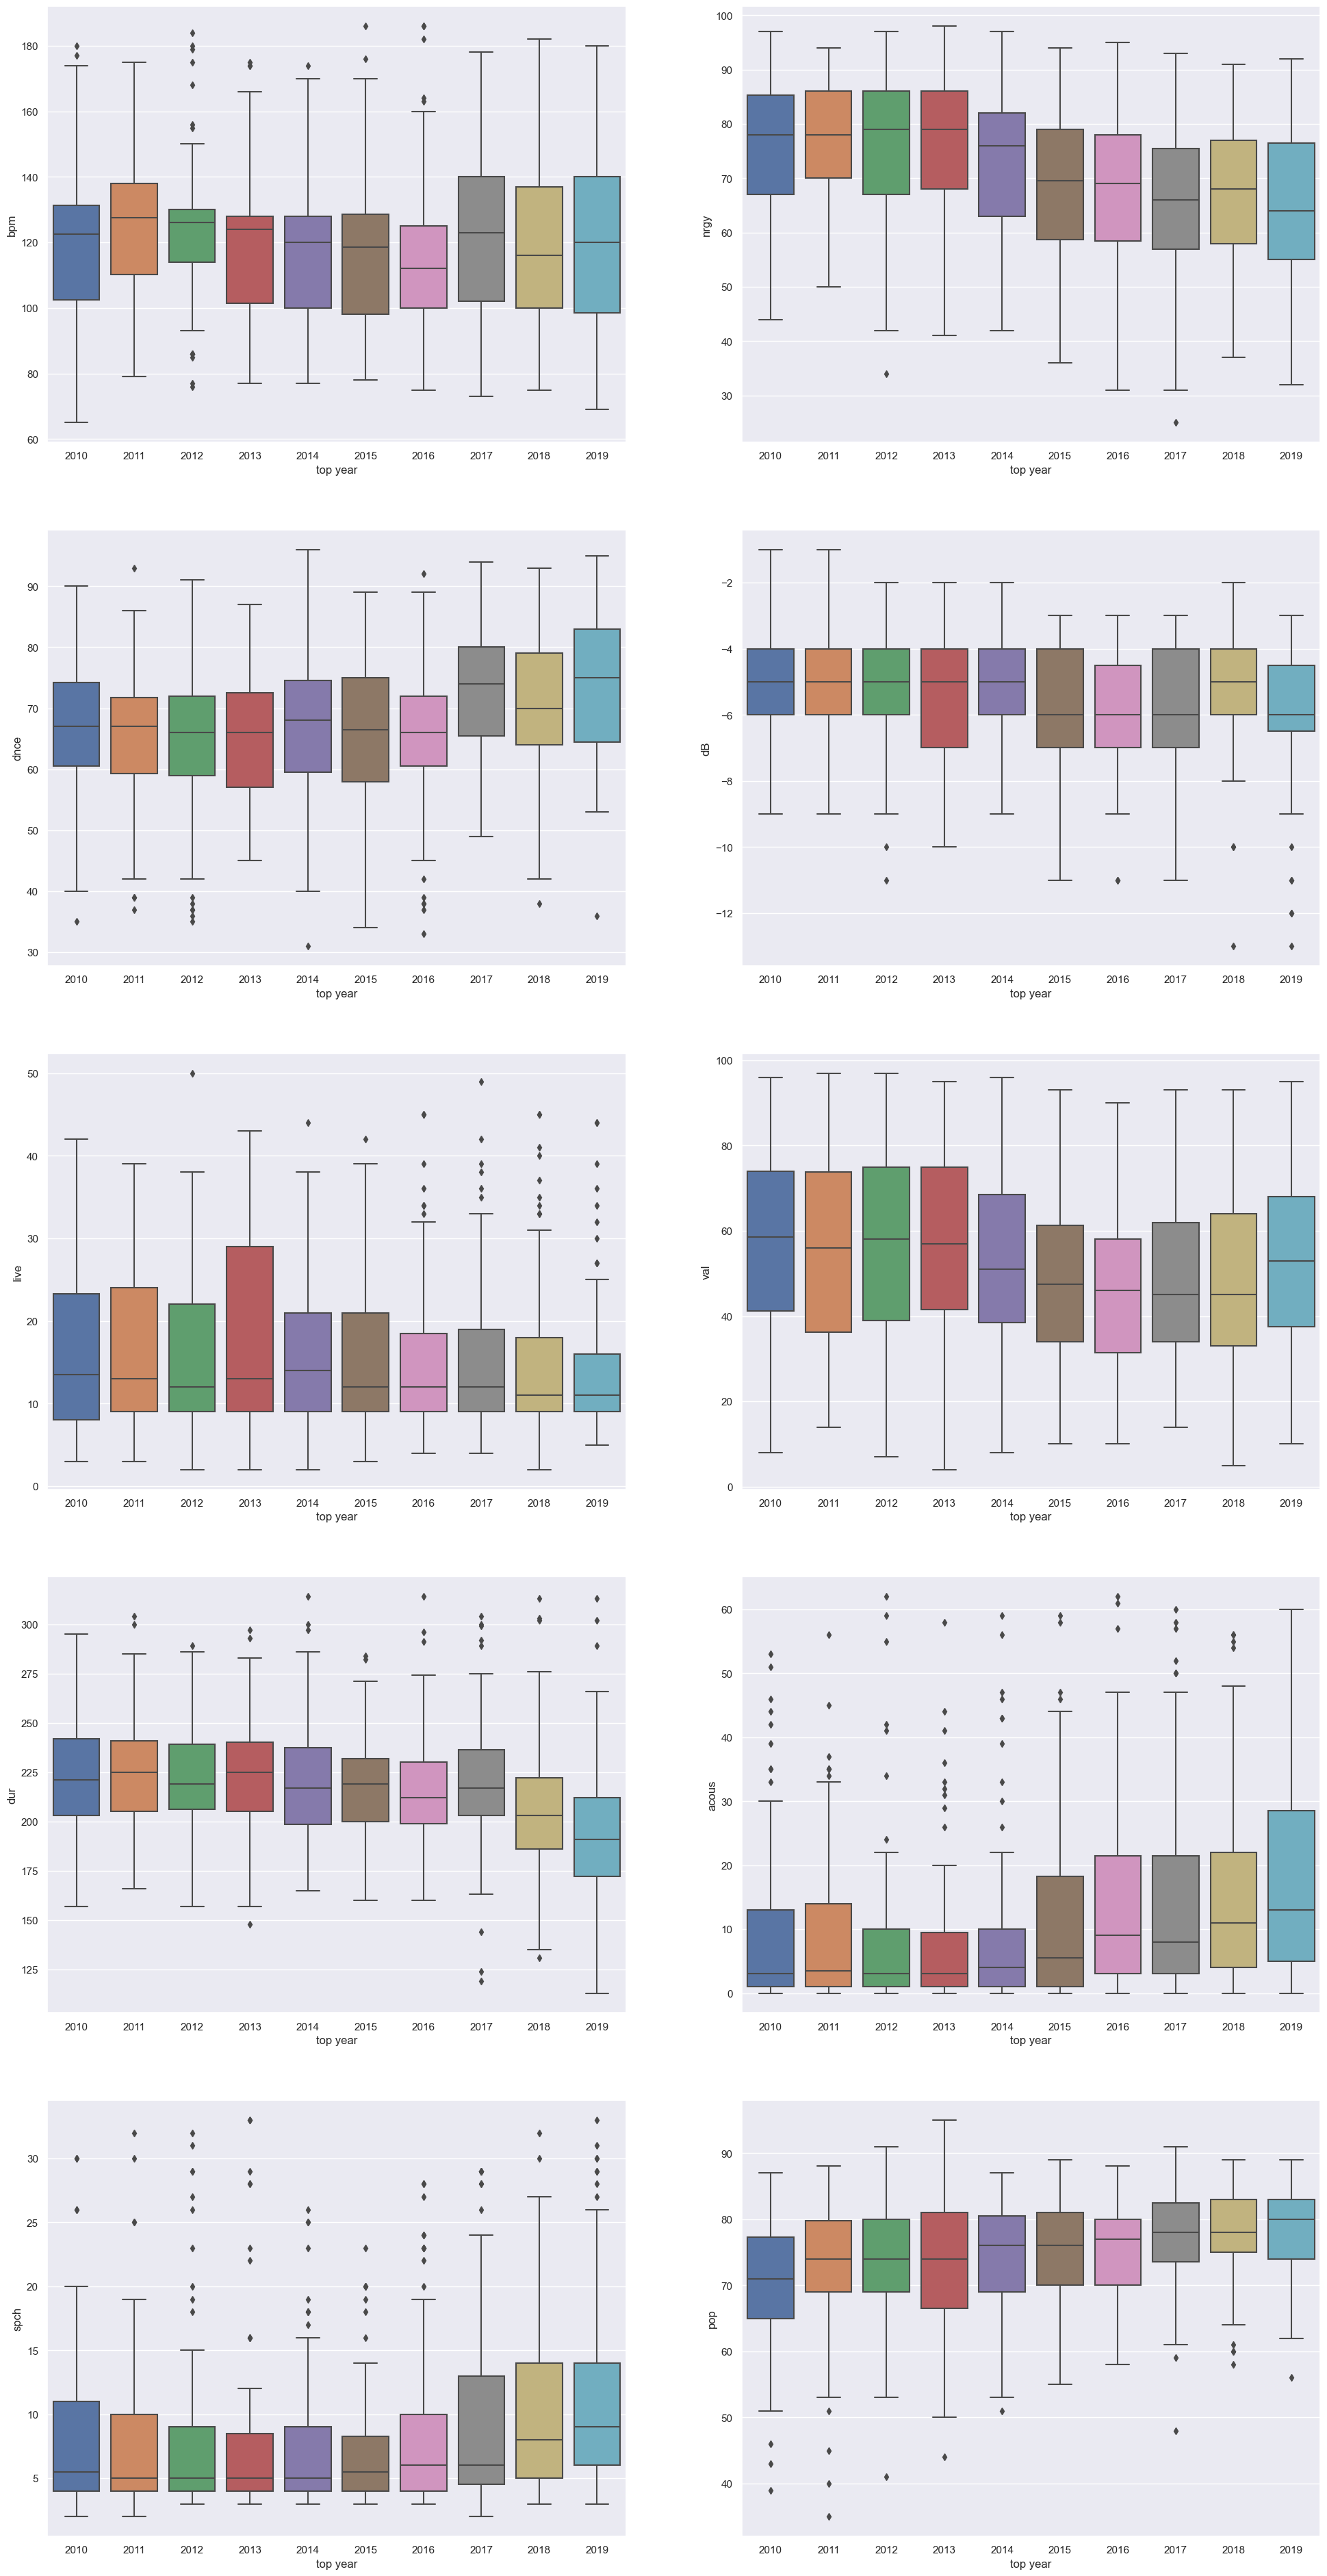

In [2]:
f, axes = plt.subplots(5, 2, figsize=(24, 48))

sb.boxplot(x="top year", y="bpm", data=spotifyData, ax = axes[0,0])
sb.boxplot(x="top year", y="nrgy", data=spotifyData, ax = axes[0,1])
sb.boxplot(x="top year", y="dnce", data=spotifyData, ax = axes[1,0])
sb.boxplot(x="top year", y="dB", data=spotifyData, ax = axes[1,1])
sb.boxplot(x="top year", y="live", data=spotifyData, ax = axes[2,0])
sb.boxplot(x="top year", y="val", data=spotifyData, ax = axes[2,1])
sb.boxplot(x="top year", y="dur", data=spotifyData, ax = axes[3,0])
sb.boxplot(x="top year", y="acous", data=spotifyData, ax = axes[3,1])
sb.boxplot(x="top year", y="spch", data=spotifyData, ax = axes[4,0])
sb.boxplot(x="top year", y="pop", data=spotifyData, ax = axes[4,1])

From the data it seems like pop has a clear upward trend, nrgy has a clear downward trend, val has a downward trend.

So it seems these values have the most impact on being in the top 100.

## Hypothesis Testing

In [9]:
current_year = 2010  

print("")
print("Checking significance for val:")
print("")

while current_year < 2017:
    year1_data = spotifyData[spotifyData['top year'] == current_year]['val']
    year2_data = spotifyData[spotifyData['top year'] == (current_year + 1)]['val']
    
    mean_year1 = np.mean(year1_data)
    mean_year2 = np.mean(year2_data)
    hypothesis_diff = mean_year2 - mean_year1  
    
    len_year1 = len(year1_data)
    len_year2 = len(year2_data)
    
    sd_year1 = np.std(year1_data)
    sd_year2 = np.std(year2_data)
    
    z_score = hypothesis_diff / np.sqrt(((sd_year2**2)/len_year2) + ((sd_year1**2)/len_year1))
    p_value = norm.cdf(z_score)  
    
    if p_value <= 0.10:
        print("Significant")
    else:
        print(p_value)
    
    current_year += 1


Checking significance for val:

0.34884520350570064
0.555003113177556
0.4608334465020342
0.17115163154467022
Significant
0.39967127319178186
0.7050037617641832


In [11]:
current_year = 2010 

print("")
print("Checking significance for nrgy:")
print("")

while current_year < 2017:
    year1_data = spotifyData[spotifyData['top year'] == current_year]['nrgy']
    year2_data = spotifyData[spotifyData['top year'] == (current_year + 1)]['nrgy']
    
    mean_year1 = np.mean(year1_data)
    mean_year2 = np.mean(year2_data)
    hypothesis_diff = mean_year2 - mean_year1  
    
    len_year1 = len(year1_data)
    len_year2 = len(year2_data)
    
    sd_year1 = np.std(year1_data)
    sd_year2 = np.std(year2_data)
    
    z_score = hypothesis_diff / np.sqrt(((sd_year2**2)/len_year2) + ((sd_year1**2)/len_year1))
    
    p_value = norm.cdf(z_score)  
    
    if p_value <= 0.10:
        print("Significant")
    else:
        print(p_value)
    
    current_year += 1


Checking significance for nrgy:

0.7502958386220234
0.352423562436863
0.22833949978053425
0.21738931252375376
Significant
0.42051236962861405
0.18550484958028796


In [10]:
current_year = 2010  

print("")
print("Checking significance for pop:")
print("")

while current_year < 2017:
    year1_data = spotifyData[spotifyData['top year'] == current_year]['pop']
    year2_data = spotifyData[spotifyData['top year'] == (current_year + 1)]['pop']
    
    mean_year1 = np.mean(year1_data)
    mean_year2 = np.mean(year2_data)
    hypothesis_diff = mean_year1 - mean_year2
    
    len_year1 = len(year1_data)
    len_year2 = len(year2_data)
    
    sd_year1 = np.std(year1_data)
    sd_year2 = np.std(year2_data)
    
    z_score = hypothesis_diff / np.sqrt(((sd_year2**2)/len_year2) + ((sd_year1**2)/len_year1))
    
    p_value = norm.cdf(z_score)  
    
    if p_value <= 0.10:
        print("Significant")
    else:
        print(p_value)
    
    current_year += 1


Checking significance for pop:

Significant
0.23582299579838067
0.5792567881233225
0.4289970781052751
0.14462056715679156
0.6545150247038813
Significant


## Machine Learning

In [6]:
X_train = spotifyData[['top year']]
X_test = spfySongs_2018_2019[['top year']]  

y_train_val = spotifyData['val']
y_test_val = spfySongs_2018_2019['val']

y_train_nrgy = spotifyData['nrgy']
y_test_nrgy = spfySongs_2018_2019['nrgy']

y_train_pop = spotifyData['pop']
y_test_pop = spfySongs_2018_2019['pop']

lr_model_val = LinearRegression()
lr_model_val.fit(X_train, y_train_nrgy)

lr_model_nrgy = LinearRegression()
lr_model_nrgy.fit(X_train, y_train_nrgy)

lr_model_pop = LinearRegression()
lr_model_pop.fit(X_train, y_train_pop)

predictions_val = lr_model_val.predict(X_test)
predictions_nrgy = lr_model_nrgy.predict(X_test)
predictions_pop = lr_model_pop.predict(X_test)

mae_val = mean_absolute_error(y_test_val, predictions_val)
rmse_val = mean_squared_error(y_test_val, predictions_val, squared=False)

mae_nrgy = mean_absolute_error(y_test_nrgy, predictions_nrgy)
rmse_nrgy = mean_squared_error(y_test_nrgy, predictions_nrgy, squared=False)

mae_pop = mean_absolute_error(y_test_pop, predictions_pop)
rmse_pop = mean_squared_error(y_test_pop, predictions_pop, squared=False)
print("")
print("Using Linear Regression:")

print("")
print("For val:")
print("Mean Absolute Error:", mae_val)
print("Root Mean Squared Error:", rmse_val)

print("")
print("For nrgy:")
print("Mean Absolute Error:", mae_nrgy)
print("Root Mean Squared Error:", rmse_nrgy)

print("")
print("For pop:")
print("Mean Absolute Error:", mae_pop)
print("Root Mean Squared Error:", rmse_pop)


Using Linear Regression:

For val:
Mean Absolute Error: 21.601567939831906
Root Mean Squared Error: 26.387617606421077

For nrgy:
Mean Absolute Error: 11.001770148694698
Root Mean Squared Error: 13.131813399505731

For pop:
Mean Absolute Error: 5.401758584081943
Root Mean Squared Error: 6.88670992467443


In [8]:
X_train = spotifyData[['top year']]
X_test = spfySongs_2018_2019[['top year']]  

y_train_val = spotifyData['val']
y_test_val = spfySongs_2018_2019['val']

y_train_nrgy = spotifyData['nrgy']
y_test_nrgy = spfySongs_2018_2019['nrgy']

y_train_pop = spotifyData['pop']
y_test_pop = spfySongs_2018_2019['pop']

rf_model_val = RandomForestRegressor(random_state=42)
rf_model_val.fit(X_train, y_train_val)

rf_model_nrgy = RandomForestRegressor(random_state=42)
rf_model_nrgy.fit(X_train, y_train_nrgy)

rf_model_pop = RandomForestRegressor(random_state=42)
rf_model_pop.fit(X_train, y_train_pop)

predictions_val = rf_model_val.predict(X_test)
predictions_nrgy = rf_model_nrgy.predict(X_test)
predictions_pop = rf_model_pop.predict(X_test)

mae_val = mean_absolute_error(y_test_val, predictions_val)
rmse_val = mean_squared_error(y_test_val, predictions_val, squared=False)

mae_nrgy = mean_absolute_error(y_test_nrgy, predictions_nrgy)
rmse_nrgy = mean_squared_error(y_test_nrgy, predictions_nrgy, squared=False)

mae_pop = mean_absolute_error(y_test_pop, predictions_pop)
rmse_pop = mean_squared_error(y_test_pop, predictions_pop, squared=False)
print("")
print("Using Random Forest Regression:")

print("")
print("For val:")
print("Mean Absolute Error:", mae_val)
print("Root Mean Squared Error:", rmse_val)

print("")
print("For nrgy:")
print("Mean Absolute Error:", mae_nrgy)
print("Root Mean Squared Error:", rmse_nrgy)

print("")
print("For pop:")
print("Mean Absolute Error:", mae_pop)
print("Root Mean Squared Error:", rmse_pop)


Using Random Forest Regression:

For val:
Mean Absolute Error: 17.629626707077783
Root Mean Squared Error: 21.35931199981068

For nrgy:
Mean Absolute Error: 10.98444469895434
Root Mean Squared Error: 13.094999513716841

For pop:
Mean Absolute Error: 5.412755465741297
Root Mean Squared Error: 6.8841968386053765
